In [1]:
using PyPlot
include("/gpfs/home/cmb/yusuket/program/scan_strategy/optimisation2/functions/spin_characterisation_w_HWP.jl")
include("/home/cmb/yusuket/scan/functions/calibration.jl")


function get_time4half_sky_coverage(SS::ScanningStrategy,; division::Int)
    h = orientation_func_hwp
    resol = Resolution(SS.nside)
    npix = nside2npix(SS.nside)
    chunk = Int(SS.duration / division)
    ω_hwp = rpm2angfreq(SS.hwp_rpm)
    hitmap = zeros(Int64, npix)
    BEGIN = 0
    p = Progress(division)
    coverage_array = zeros(division)
    chunk_time = zeros(division)
    covertime = 0
    @views @inbounds for i = 1:division
        END = i * chunk
        coverage_chunk = sum(sign.(hitmap))/resol.numOfPixels
        coverage_array[i] = coverage_chunk
        chunk_time[i] = BEGIN
        pix_tod, psi_tod, time_array = get_pointing_pixels(SS, BEGIN, END)
        @views @inbounds for j = eachindex(psi_tod[1,:])
            pix_tod_jth_det = pix_tod[:,j]
            psi_tod_jth_det = psi_tod[:,j]
            @views @inbounds for k = eachindex(psi_tod[:,1])
                t = time_array[k]
                coverage = sum(sign.(hitmap))/resol.numOfPixels
                Ωₖ = pix_tod_jth_det[k]
                ψₖ = psi_tod_jth_det[k]
                ϕ_hwp = mod2pi(ω_hwp*t)
                hitmap[Ωₖ] += 1
                if coverage > 0.5 
                    covertime = t#chunk_time[findmax(coverage_array)[2]]
                   return half_sky_coverage(chunk_time, coverage_array, covertime, hitmap, SS)
                end
            end
        end
        BEGIN = END
        next!(p)
    end
    covertime = chunk_time[findmax(coverage_array)[2]]
    return half_sky_coverage(chunk_time, coverage_array, covertime, hitmap, SS)
end

idx = 1#parse(Int64, ARGS[1])
step = 3
alpha_plus_beta = 95
alpha = step:step:alpha_plus_beta-step
T_alpha = logspace(log10(19.71*60), log10(24*60*60*365), 50)

FWHM = 17.9/60
hwprpm = 61
f_hwp = hwprpm/60

alpha_grid, T_prec_grid, T_spin_grid = gen_scan_parameter_space(alpha, T_alpha, FWHM, f_hwp, alpha_plus_beta)

nside = 128
ss = gen_ScanningStrategy()
ss.nside = nside
ss.sampling_rate = 1.0
ss.FP_theta = [0]
ss.FP_phi = [0]
ss.hwp_rpm = hwprpm
ss.alpha = vec(alpha_grid)[idx]
ss.beta = alpha_plus_beta - ss.alpha
ss.spin_rpm = period2rpm(T_spin_grid[idx], unit="sec")
ss.prec_rpm = period2rpm(T_prec_grid[idx], unit="sec")
ss.coord = "E"
alpha_grid, T_prec_grid, T_spin_grid = 0, 0, 0


(0, 0, 0)

In [2]:
division = 12
ss.duration = 60*60*24
@time result = get_time4half_sky_coverage(ss, division=division)

save_dir = "/group/cmb/litebird/usr/ytakase/scan_optimisation/calibration/sky_coverage/half_sky_cover_time/output"
create_h5_file(save_dir, idx, "230515_test", result)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:37


 39.510752 seconds (12.81 M allocations: 127.139 GiB, 9.33% gc time, 8.05% compilation time)


In [3]:
function period2rpm_(period,; unit="min")
    if unit == "min"
        rpm = 1.0 / period
    end
    if unit == "sec"
        rpm = 1.0 / (period/60.0)
    end
    if unit == "hour"
        rpm = 1.0 / (period*60)
    end
    return rpm
end

period2rpm_ (generic function with 1 method)

In [19]:
ss = gen_ScanningStrategy()
ss.duration = 60*60*24*4
ss.nside = 128
ss.sampling_rate = 19.0
ss.spin_rpm = period2rpm(20, unit="min")
ss.prec_rpm = period2rpm_(192.348, unit="min")

ss1 = gen_ScanningStrategy()
ss1.duration = 60*60*24
ss1.nside = 256
ss1.sampling_rate = 1.0
ss1.prec_rpm = period2rpm(60*60*24, unit="sec")

0.0006944444444444445

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


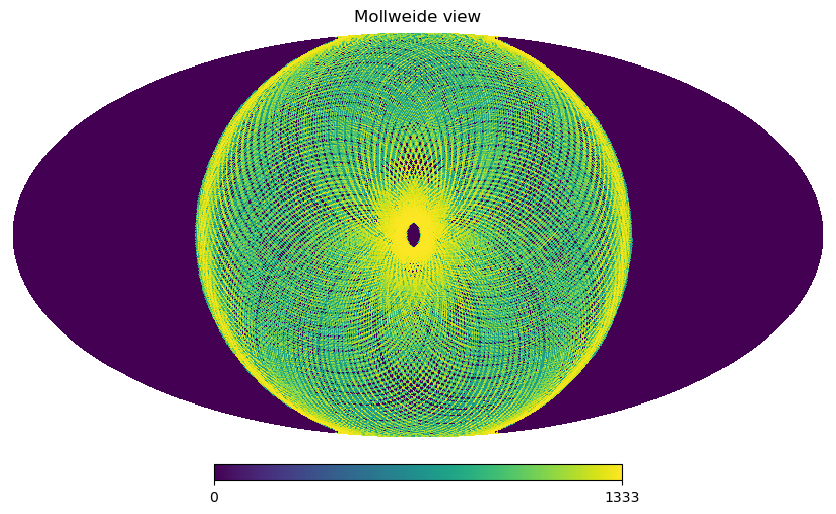

0.5051116943359375

In [20]:
maps = ScanningStrategy2map(ss, division = 6);
hp.mollview(maps[1], norm="hist")
sum(sign.(maps[1]))/(12*nside^2)

In [6]:
result = get_time4half_sky_coverage(ss, division=12)

Progress:  33%|█████████████▋                           |  ETA: 0:31:19

LoadError: InterruptException:

In [13]:
idx = 1
save_dir = "/group/cmb/litebird/usr/ytakase/scan_optimisation/calibration/sky_coverage/half_sky_cover_time/output"
create_h5_file(save_dir, idx, "230325_test", result)

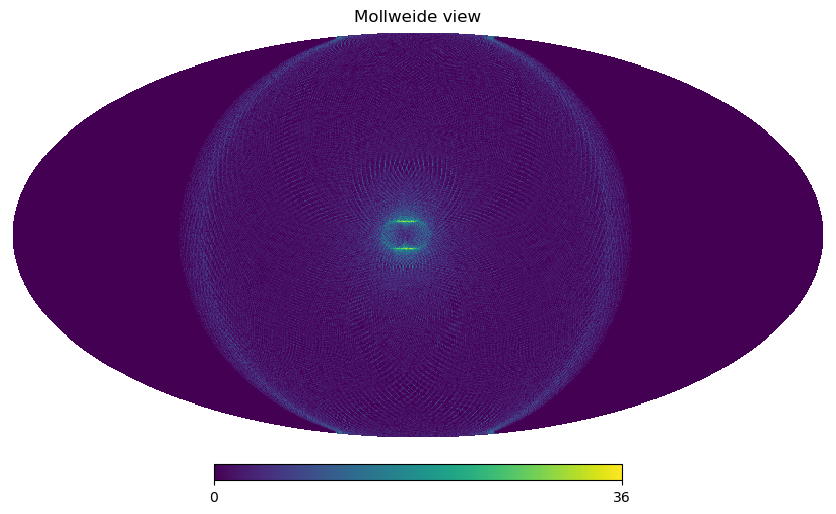

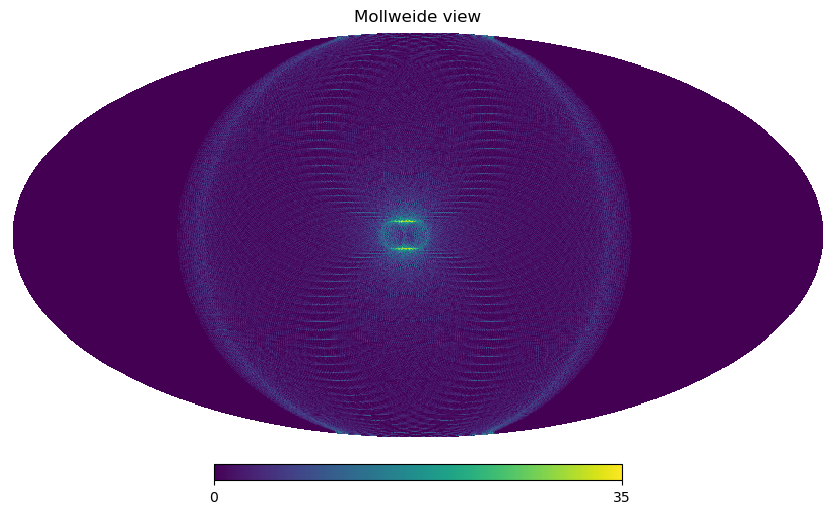

In [11]:
hp.mollview(result.hitmap)
hp.mollview(hitmap1)

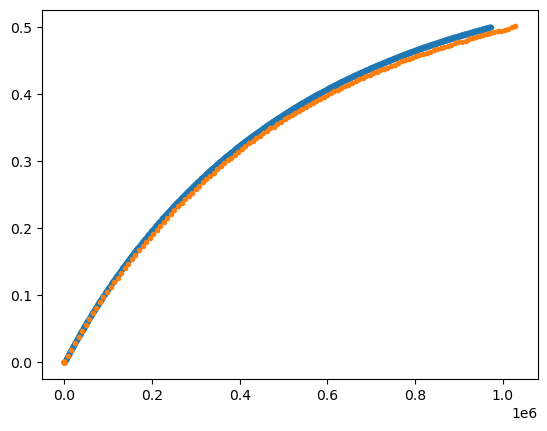

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbc32d9c040>

In [13]:
plt.plot(chunk_time, coverage_array, ".")
plt.plot(chunk_time1, coverage_array1, ".")

In [18]:
chunk_time[findmax(coverage_array)[2]]

972864.0